In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import yfinance as yf

In [ ]:
stocks = input ("Enter the code of the stock:- ")
data = yf.download(stocks,"2008-01-01","2021-12-31", auto_adjust=True)
data.head(10)

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


In [5]:
data.value_counts()

Series([], dtype: int64)

In [6]:
data.shape

(0, 6)

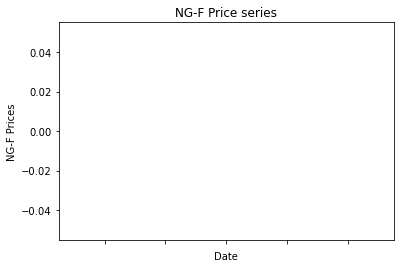

In [7]:
data.Close.plot()
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price series".format(stocks))
plt.show()

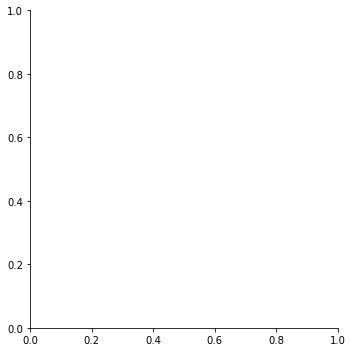

In [8]:
sns.displot(data["Close"])

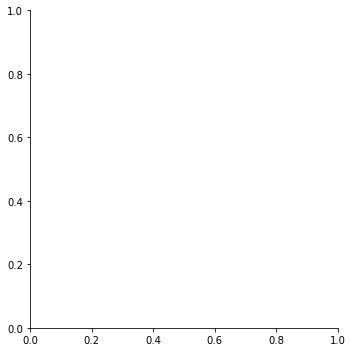

In [9]:
sns.displot(data["Open"])

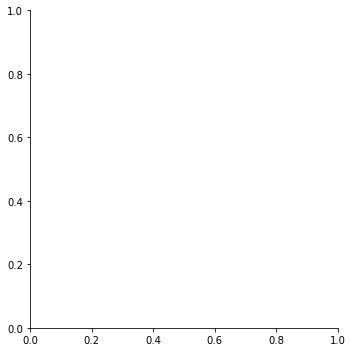

In [10]:
sns.displot(data["High"])

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [12]:
X = data.drop(["Close"], axis=1)
y = data["Close"]
print(X,y)


Empty DataFrame
Columns: [Open, High, Low, Adj Close, Volume]
Index: [] Series([], Name: Close, dtype: float64)


In [13]:
y.value_counts().sum()

0

In [14]:
X.value_counts().sum()

0

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 0)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
y_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [ ]:
print(predictions)

In [ ]:
print(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [ ]:
def calculate_metrics(y_test,y_predict):
    mse = mean_squared_error(y_test,y_predict)
    rmse = np.sqrt(mse)
    rt_score = r2_score(y_test,y_predict)
    print("The mean square error is " , mse)
    print("The root mean square error is ",rmse)
    print("The root score ", rt_score)

In [ ]:
calculate_metrics(y_test,predictions)

In [ ]:
import pickle

In [ ]:
with open("model_pickle","wb") as f:
    pickle.dump(lr,f)